# WeRateDogs Twitter Data Analysis : A Data Wrangling Project

## by Chinonso Okonkwo

### Importing Packages

In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import requests
import os
import json
import tweepy
import re
import warnings
warnings.filterwarnings("ignore")

## Data Gathering

**1. Read data in using read_csv**

In [2]:
# Reading WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) to a dataframe
df1 = pd.read_csv('twitter-archive-enhanced.csv', sep=',')

In [3]:
# Checking to see if it was correctly done
df1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


**2. Using Requests Library to download Tweet Image Prediction data**

In [4]:
# Creating a directory if it doesn't exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
# Storing url in a variable
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [6]:
# Opening the file
with open(os.path.join(folder_name, url.split('/')[-1]) , mode='wb') as file:
    file.write(response.content)

In [7]:
# Reading the file into a dataframe using pandas read_csv
df2 = pd.read_csv(url, sep='\t')

In [8]:
# Checking first two rows to see if it was correctly done
df2.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


**3. Gathering additional data via Twitter API using Tweepy Library**

In [9]:
# Importing packages
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [10]:
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '..........'
consumer_secret = '...........'
access_token = '..............'
access_secret = '.............'

In [11]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [12]:
# Tweet id to gather data via twitter API
tweet_ids = df1.tweet_id.values
len(tweet_ids)

2356

In [13]:
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149])

In [14]:
# Getting the status of a tweet id
status = api.get_status(892420643555336193, tweet_mode='extended')
status

Status(_api=<tweepy.api.API object at 0x7fc9cb8559b0>, _json={'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540,

In [15]:
import time
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0

# creating an error dictionary to catch errors that might occur
error_dict = {}
start_time = time.time()

# Saving each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as file:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            # Getting the status id of each tweet id
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            # Converting each tweet status to a JSON object/string and saving to a file
            json.dump(tweet._json, file)
            file.write('\n')
        # Catching errors that occured 
        except tweepy.TweepError as error:
            print("Error")
            # Appending errors to error_dict
            error_dict[tweet_id] = error
            pass
end_time = time.time()
print(end_time - start_time)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Error
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 886054160059072

Error
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
29

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Error
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
80

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
15

Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
18

Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
20

Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
23

In [16]:
print(error_dict)

{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 856602993587888130: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 856330835276025856: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 851953902622658560: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 851861385021730816: TweepError([{'code': 144, 'message': 'N

In [17]:
len(error_dict)

32

In [18]:
# Creating an empty list
df3_list = []
# Opening and Reading text file
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file.readlines():
        tweet_line = json.loads(line)
        # Getting the requred columns
        tweet_id = tweet_line['id']
        retweet_count = tweet_line['retweet_count']
        favorite_count = tweet_line['favorite_count']
        
         # Appending each to the list
        df3_list.append({
                "tweet_id" : tweet_id,
                "retweet_count" : retweet_count,
                "favorite_count" : favorite_count})
        

In [19]:
# converting to pandas dataframe
df3 = pd.DataFrame(df3_list, columns=["tweet_id",'retweet_count', 'favorite_count'])

In [20]:
# Checking to see if it was correctly done
df3.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33811
1,892177421306343426,5301,29330
2,891815181378084864,3481,22050


## Assessing Data

### Assessing df1 (Twitter Archive Data)

#### Twitter Archive Data- df1 Column Description

*Here's a brief decription of column headers*

. tweet_id - unique id for each tweet by the twitter account @DogRates

.in_reply_to_status_id -  If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID

.in_reply_to_user_id - If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID. This will not necessarily always be the user directly mentioned in the Tweet.

.timestamp - The time the tweet was tweeted

.source - The source of the tweet

.text - This is the content of the tweet

.retweeted_status_id	- This attribute contains a representation of the original Tweet that was retweeted.

.retweeted_status_user_id - The id of the retweeted status user	

.retweeted_status_timestamp - This attribute contains a representation of the time the original Tweet was retweeted.

.expanded_urls	- This is the url of the tweet( can be used to access the tweet directly)

.rating_numerator - This is the numerator of the ratings for the dog	

.rating_denominator - his is the denominator of the ratings for the dog(should always be 10)

.name - This is the name of the dog

.doggo - This is one of the dog stages

.floofer	- This is one of the dog stages

.pupper - This is one of the dog stages

.puppo - This is one of the dog stages

(some of the descriptions were gotten from twitter, others by me from the project motivation)

#### Visual Assessment

In [21]:
# Scrolling through the dataframe to assess
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Programmatic Assessment

In [22]:
# Checking the first five rows
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [23]:
# Checking the last five rows
df1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [24]:
# Checking random 5 rows
df1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1115,732726085725589504,NaN,NaN,2016-05-18 00:14:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aldrick. He looks wise af. Also except...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732726085...,11,10,Aldrick,None,None,None,None
432,820749716845686786,NaN,NaN,2017-01-15 21:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sunny. He can take down a polar bear in o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820749716...,13,10,Sunny,None,None,None,None
1039,744234799360020481,NaN,NaN,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,None,None,None
116,870308999962521604,NaN,NaN,2017-06-01 16:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Rumble, but he's not ready to. Would r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/870308999...,13,10,Rumble,None,None,None,None
1629,684567543613382656,NaN,NaN,2016-01-06 02:49:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bobby. He doesn't give a damn about pe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684567543...,4,10,Bobby,None,None,None,None


In [25]:
# Checking the number of rows and columns
df1.shape

(2356, 17)

The twitter archive data contains 2356 rows of data and 17 columns

In [26]:
# Getting a concise summary of data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [27]:
# Checking Statistics of data
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [28]:
# Checking for duplicates
df1.duplicated().sum()

0

In [29]:
# Checking for missing data or nulls
df1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [30]:
# Getting counts of unique values in rating_denominator column and sorting in descending order
df1.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [31]:
df1.rating_denominator[df1.rating_denominator != 10]

313       0
342      15
433      70
516       7
784      11
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1598     20
1634    130
1635    110
1662     11
1663     16
1779    120
1843     80
2335      2
Name: rating_denominator, dtype: int64

In [32]:
len(df1.rating_denominator[df1.rating_denominator != 10])

23

As shown above, There are 23 rows where the rating_denominator is not 10, this is an inconsistent issue and will be addressed

In [33]:
# Getting counts of unique values in rating_denominator column and sorting in ascending order
df1.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

As observed above, There are rows where rating_numerator is greater than 10, but this will not be addressed since its part of the unique rating system of @DogRates

In [34]:
# Getting counts of unique values of name column
df1.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
the           8
Sadie         8
Toby          7
Bailey        7
Daisy         7
Buddy         7
an            7
Milo          6
Scout         6
Oscar         6
Leo           6
Jax           6
Bella         6
Koda          6
Rusty         6
Jack          6
Dave          6
Stanley       6
Finn          5
           ... 
Filup         1
Strider       1
Strudel       1
Carbon        1
Dwight        1
Walker        1
Coopson       1
Beya          1
Dixie         1
Ziva          1
Hermione      1
Derby         1
Ralpher       1
Winifred      1
Banjo         1
this          1
Gustaf        1
Anna          1
Mollie        1
Hero          1
Tater         1
Rupert        1
Oddie         1
Darrel        1
Mary          1
Carper        1
his           1
Pip           1
Monster       1
Ruffles       1
Name: name, Length: 957,

I observe that most of the dog names that aren't real names are starting will lower case, I'll further assess that with a code below

In [35]:
# Using Regex to get the list of all names that are lowercase 
names_lower = df1.name.str.contains('^[a-z]', regex = True)
df1[names_lower].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [36]:
len(df1[names_lower].name)

109

This has been successfully assessed that all strings starting with lower case are not Dog names

In [37]:
df1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [38]:
# Getting the content of the text in the first row
df1.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [39]:
# Checking the names of each columns since I plan to merge dataframes where possible
df1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

## Assesing df2 (Image Predictions data)

*Here's a brief decription of column headers*

.tweet_id - unique id for each tweet by the twitter account	

.jpg_url	- url for the dog image

.img_num	- image number ranging from 1 to 4

.p1	- the algorithm's #1 prediction for the image in the tweet 

.p1_conf	- how confident the algorithm is in its #1 prediction

.p1_dog	-  whether or not the #1 prediction is a breed of dog

.p2	- the algorithm's #2 prediction for the image in the tweet

.p2_conf	- how confident the algorithm is in its #2 prediction

.p2_dog	-  whether or not the #2 prediction is a breed of dog

.p3	- the algorithm's #3 prediction for the image in the tweet

.p3_conf	- how confident the algorithm is in its #3 prediction

.p3_dog-  whether or not the #3 prediction is a breed of dog

(column description was gotten from Project motivation in classroom)

#### Visual Assessment

In [40]:
# Checking the rows and columns visually for any  tidiness and data quality issues.
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Programmatic Assessment

In [41]:
# Checking the first five rows
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [42]:
# Checking the last five rows
df2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [43]:
# Checking random 5 rows
df2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
556,677673981332312066,https://pbs.twimg.com/media/CWeU5LBWEAA8F0J.jpg,1,Maltese_dog,0.817908,True,Angora,0.077805,False,Pomeranian,0.022184,True
1608,800751577355128832,https://pbs.twimg.com/media/CxzXOyBW8AEu_Oi.jpg,2,cocker_spaniel,0.771984,True,miniature_poodle,0.076653,True,toy_poodle,0.039618,True
1396,767884188863397888,https://pbs.twimg.com/media/CqgSl4DWcAA-x-o.jpg,3,coral_reef,0.327740,False,cliff,0.157182,False,lakeside,0.048810,False
1095,720043174954147842,https://pbs.twimg.com/media/Cf4bcm8XEAAX4xV.jpg,1,Samoyed,0.954517,True,Eskimo_dog,0.029130,True,white_wolf,0.004462,False
281,671122204919246848,https://pbs.twimg.com/media/CVBOFTLWwAAzlNi.jpg,1,goose,0.351957,False,Chihuahua,0.101228,True,hen,0.065818,False


In [44]:
# Checking the number of rows and columns
df2.shape

(2075, 12)

The Image prediction dataframe consists of 2075 rows and 12 columns

In [45]:
# Getting a concise summary of data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [46]:
# Checking statistics of data for numerical variables
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [47]:
# Checking for duplicates
df2.duplicated().sum()

0

In [48]:
# Checking for missing data or nulls
df2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [49]:
# Getting counts of unique values of p1_dog column
df2.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [50]:
# Getting counts of unique values of p1 column
df2.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
beagle                        18
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
Eskimo_dog                    18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [51]:
df2.p1_conf.value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
0.420463    2
0.581403    2
0.403698    2
0.530104    2
0.254856    2
0.346545    2
0.721188    2
0.677408    2
0.907083    2
0.243529    2
0.505370    2
0.593858    2
0.372202    2
0.274637    2
0.600276    2
0.506312    2
0.615163    2
0.556595    2
0.995143    2
0.809197    2
0.964929    2
0.777468    2
0.336200    2
0.617389    2
0.786089    2
           ..
0.483228    1
0.556524    1
0.176423    1
0.318981    1
0.733025    1
0.730152    1
0.436023    1
0.479008    1
0.162935    1
0.897162    1
0.320420    1
0.999833    1
0.995873    1
0.523206    1
0.942911    1
0.537652    1
0.672791    1
0.952258    1
0.855959    1
0.665578    1
0.841265    1
0.668164    1
0.946828    1
0.714719    1
0.352946    1
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [52]:
# Checking the names of each columns since I plan to merge dataframes where possible
df2.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

## Assessing df3 (Tweets Data)

*Here's a brief decription of column headers*

tweet_id - unique id for each tweet by the twitter account @DogRates

retweet_count - the number of times the tweet has been retweeted 

favorite_count - the number of times the tweet has been favorited(now known as liked)

#### Visual Assessment

In [53]:
# Checking the rows and columns visually for any  tidiness and data quality issues 
df3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33811
1,892177421306343426,5301,29330
2,891815181378084864,3481,22050
3,891689557279858688,7217,36902
4,891327558926688256,7760,35312
5,891087950875897856,2602,17812
6,890971913173991426,1663,10363
7,890729181411237888,15752,56863
8,890609185150312448,3620,24522
9,890240255349198849,6098,27960


#### Programmatic Assessment

In [54]:
# Checking the first five rows
df3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33811
1,892177421306343426,5301,29330
2,891815181378084864,3481,22050
3,891689557279858688,7217,36902
4,891327558926688256,7760,35312


In [55]:
# Checking the last five rows
df3.tail()

,tweet_id,retweet_count,favorite_count
2319,666049248165822465,37,89
2320,666044226329800704,115,247
2321,666033412701032449,36,100
2322,666029285002620928,39,112
2323,666020888022790149,423,2293


In [56]:
# Checking random 5 rows
df3.sample(5)

,tweet_id,retweet_count,favorite_count
838,762471784394268675,5920,10523
795,770655142660169732,1668,6929
1083,733482008106668032,854,2883
1514,689557536375177216,405,1906
132,865718153858494464,4851,22935


In [57]:
# Checking the number of rows and columns
df3.shape

(2324, 3)

In [58]:
# Getting a concise summary of data
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 3 columns):
tweet_id          2324 non-null int64
retweet_count     2324 non-null int64
favorite_count    2324 non-null int64
dtypes: int64(3)
memory usage: 54.5 KB


In [59]:
# Checking for duplicates
df3.duplicated().sum()

0

In [60]:
# Checking for missing data or nulls
df3.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [61]:
# Checking the names of each columns since I plan to merge dataframes where possible
df3.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Quality issues

1.Retweeted status id is not null(Needs to be dropped) because I only need Tweets and not Retweets acording to the information given for this project

2.Rating Denominator is not 10 in some row

3.Source column is an href(combination of url and text) instead of text only which i need

4.Incorrect dog names in name column (quite, none, a, an etc) (might be dropped if it won't affect my analysis)

5.Irrelevant column img_num needs to be dropped because I'll not be using it for analysis

6.Missing values in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls columns

7.Redundant data in text column

8.Timestamp and retweeted_status_timestamp as string datatype instead of datetime/ Incorrect datatype of timestamp and retweetedstatus_timestamp column

9.Tweet Id as integer instead of string (incorrect  datatype)


### Tidiness issues

1.dog_stage in Twitter Archive table(df1) is in 4 columns instead of 1.

2.Twitter archive data (df1), image Predictions data(df2), and Tweets data (df3) should be combined as one

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [62]:
# Making copies of original pieces of data
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()


### Issue #1:

#### Define:
Drop Rows where Retweet_id is not null (Because We Only need Tweets and not Retweets for our analysis)

#### Code

In [63]:
# Filtering to get only rows where retweets is null
df1_clean = df1_clean[df1_clean.retweeted_status_id.isnull()]


#### Test

In [64]:
df1_clean.retweeted_status_id.notnull().sum()

0

In [65]:
df1_clean.retweeted_status_user_id.notnull().sum()

0

In [66]:
df1_clean.retweeted_status_timestamp .notnull().sum()

0

**COMMENT** : As observed above, there are no rows where retweeted_status_id is not null, the code also handled retweeted_status_user_id and retweeted_status_timestamp.
Now, we are sure we only have Tweets and not Retweets in our dataframe.
We can move on with further cleaning.

## Issue #2

#### Define

Drop rows where rating_denominator is not 10 (the rows to be dropped are 23 as shown in assessing, and this won't affect my analysis)

#### Code

In [67]:
# Getting the count of rows where denominator is not equal to 10
len(df1.rating_denominator[df1.rating_denominator != 10])

23

In [68]:
# Filter to get only rows where rating_denominator is equal to 10
df1_clean= df1[df1['rating_denominator'] == 10]

#### Test

In [69]:
len(df1_clean.rating_denominator[df1.rating_denominator != 10])

0

In [70]:
df1_clean.rating_denominator.value_counts()

10    2333
Name: rating_denominator, dtype: int64

**COMMENT** : There are no rows where the denominator is not equal to 10

## Issue #3

#### Define

Extract source text from source column in twitter achive data(df1_clean)

#### Code

In [71]:
# Getting the unique values in source column
df1_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2198
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [72]:
# Replacing the source with only the text component
df1_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone', inplace=True)
df1_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene', inplace=True)
df1_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client', inplace=True)
df1_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', inplace=True)


#### Test

In [73]:
df1_clean.source.value_counts()

Twitter for iPhone     2198
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

## Issue #4

#### Define

Remove rows where dog name is in lower case (not real dog names)

#### Code

In [74]:
# Using Regex(Regular expressions) to get the list of all names that are lowercase 
names_lower = df1_clean.name.str.contains('^[a-z]', regex = True)
df1_clean[names_lower].name.value_counts().sort_index()

a               54
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
unacceptable     1
very             5
Name: name, dtype: int64

In [75]:
# Checking count of number of rows where name is in lowercase
len(df1_clean[names_lower].name)

106

In [76]:
# Filtering to get only rows where name contains with Upper case letter
df1_clean = df1_clean[df1_clean['name'].str.contains('^[A-Z]+')]

#### Test

In [77]:
df1_clean[names_lower].name.value_counts().sort_index()

Series([], Name: name, dtype: int64)

In [78]:
len(df1_clean[names_lower].name)

0

## Issue #5

#### Define

Drop column image number img_num in image predictions dataframe(df2_clean) because I won't be using it for analysis

#### Code

In [79]:
df2_clean.drop('img_num', axis=1, inplace=True)

#### Test

In [80]:
df2_clean.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [81]:
df2_clean.head(0)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Issue #6

#### Define

Drop columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls(6 Columns) (Because they contain missing values or I won't be needing them for analysis)

#### Code

In [82]:
df1_clean.drop(columns= ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

#### Test

In [83]:
df1_clean.shape

(2227, 11)

In [84]:
df1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [85]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2227 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2227 non-null int64
timestamp             2227 non-null object
source                2227 non-null object
text                  2227 non-null object
rating_numerator      2227 non-null int64
rating_denominator    2227 non-null int64
name                  2227 non-null object
doggo                 2227 non-null object
floofer               2227 non-null object
pupper                2227 non-null object
puppo                 2227 non-null object
dtypes: int64(3), object(8)
memory usage: 208.8+ KB


## Issue #7

#### Define

Join doggo, floofer, pupper, and puppo columns into a single column called "dog_stage'using lambda, Then drop the columns

#### Code

In [86]:
# Replacing none in the respective columns with no space
df1_clean['doggo'].replace("None",  "", inplace=True)
df1_clean['floofer'].replace("None", "", inplace=True)
df1_clean['pupper'].replace("None", "", inplace=True)
df1_clean['puppo'].replace("None", "", inplace=True)

In [87]:
# Using lambda to join the columns
df1_clean['dog_stage'] = df1_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ''.join(x), axis = 1)

In [88]:
# Brief check
df1_clean.dog_stage.value_counts()

                1863
pupper           233
doggo             81
puppo             29
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

As seen above, some stages are more than one and cramped up, I'll edit that with a code below

In [89]:
# Separating rows that meet certain conditions with a comma
df1_clean['dog_stage'].mask(df1_clean['dog_stage'] == 'doggopupper', 'doggo,pupper', inplace=True)
df1_clean['dog_stage'].mask(df1_clean['dog_stage'] == 'doggofloofer', 'doggo,floofer ', inplace=True) 
df1_clean['dog_stage'].mask(df1_clean['dog_stage'] == 'doggopuppo', 'doggo,puppo', inplace=True) 

In [90]:
# Replacing empty spaces with None in the dog_stage column
df1_clean['dog_stage'] = df1_clean['dog_stage'].replace('', 'None')

In [91]:
# Dropping columns
df1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [92]:
df1_clean.dog_stage.value_counts()

None              1863
pupper             233
doggo               81
puppo               29
doggo,pupper        10
floofer              9
doggo,floofer        1
doggo,puppo          1
Name: dog_stage, dtype: int64

In [93]:
# check if doggo, floofer, pupper and puppo columns have been successfully dropped
df1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [94]:
df1_clean.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None


## Issue #8

#### Define

Merging Twitter archive data(df1_clean), Image Predictions(df2_clean),  and Tweet data (df3_clean)

#### Code

In [95]:
df1_clean.shape

(2227, 8)

In [96]:
df2_clean.shape

(2075, 11)

In [97]:
df3_clean.shape

(2324, 3)

In [98]:
# merge inner to get only tweets that appear in both dataframe
df_merged =df1_clean.merge(df3_clean, how='inner', on='tweet_id')

In [99]:
df_merged2 =df_merged.merge(df2_clean, how='inner', on='tweet_id')

#### Test

In [100]:
df_merged2

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,7009,33811,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,5301,29330,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,3481,22050,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,7217,36902,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,7760,35312,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,None,None,2602,17812,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,1663,10363,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a g...,13,10,None,None,15752,56863,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,3620,24522,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,6098,27960,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [101]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1940 entries, 0 to 1939
Data columns (total 20 columns):
tweet_id              1940 non-null int64
timestamp             1940 non-null object
source                1940 non-null object
text                  1940 non-null object
rating_numerator      1940 non-null int64
rating_denominator    1940 non-null int64
name                  1940 non-null object
dog_stage             1940 non-null object
retweet_count         1940 non-null int64
favorite_count        1940 non-null int64
jpg_url               1940 non-null object
p1                    1940 non-null object
p1_conf               1940 non-null float64
p1_dog                1940 non-null bool
p2                    1940 non-null object
p2_conf               1940 non-null float64
p2_dog                1940 non-null bool
p3                    1940 non-null object
p3_conf               1940 non-null float64
p3_dog                1940 non-null bool
dtypes: bool(3), float64(3), int64(5), ob

## Issue #9:

#### Define

Drop text column

#### Code

In [102]:
df_merged2.drop(['text'], axis = 1, inplace=True)

#### Test

In [103]:
df_merged2.columns

Index(['tweet_id', 'timestamp', 'source', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'retweet_count',
       'favorite_count', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

## Issue #10

#### Define

Convert tweet_id to string, timestamp to datetime, dog_stage to categorical, p1_dog, p2_dog and p3_dog to categorical datatype.

#### Code

In [104]:
df_merged2.tweet_id = df_merged2.tweet_id.astype(str)

In [105]:
df_merged2.timestamp = pd.to_datetime(df_merged2.timestamp)

In [106]:
df_merged2.dog_stage = df_merged2.dog_stage.astype('category')

In [107]:
df_merged2.p1_dog = df_merged2.p1_dog.astype('category')

In [108]:
df_merged2.p2_dog = df_merged2.p2_dog.astype('category')

In [109]:
df_merged2.p3_dog = df_merged2.p3_dog.astype('category')

#### Test

In [110]:
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1940 entries, 0 to 1939
Data columns (total 19 columns):
tweet_id              1940 non-null object
timestamp             1940 non-null datetime64[ns]
source                1940 non-null object
rating_numerator      1940 non-null int64
rating_denominator    1940 non-null int64
name                  1940 non-null object
dog_stage             1940 non-null category
retweet_count         1940 non-null int64
favorite_count        1940 non-null int64
jpg_url               1940 non-null object
p1                    1940 non-null object
p1_conf               1940 non-null float64
p1_dog                1940 non-null category
p2                    1940 non-null object
p2_conf               1940 non-null float64
p2_dog                1940 non-null category
p3                    1940 non-null object
p3_conf               1940 non-null float64
p3_dog                1940 non-null category
dtypes: category(4), datetime64[ns](1), float64(3), int64(4),

## Storing to a csv file

In [111]:
# storing in a csv file called twitter_archive_master.csv
df_merged2.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [112]:
# Reading the cleaned data to a datframe
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [113]:
# A preview
twitter_archive_master.head()

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,13,10,Phineas,None,7009,33811,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,13,10,Tilly,None,5301,29330,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,12,10,Archie,None,3481,22050,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,13,10,Darla,None,7217,36902,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,12,10,Franklin,None,7760,35312,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Q1: How is source of tweet shared?

In [114]:
twitter_archive_master['source'].value_counts()

Twitter for iPhone    1904
Twitter Web Client      27
TweetDeck                9
Name: source, dtype: int64

Text(0.5,1,'Source of Tweet')

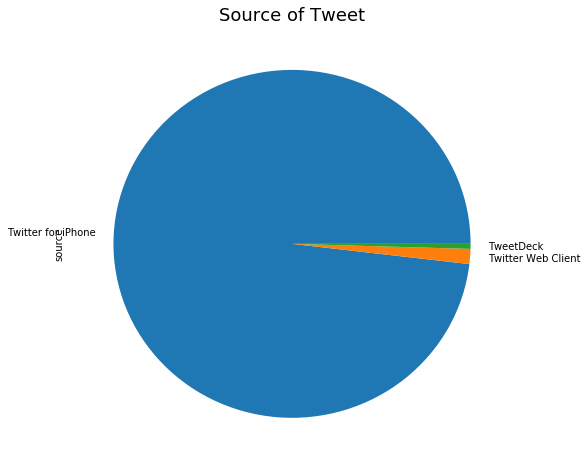

In [115]:
twitter_archive_master['source'].value_counts().plot(kind='pie', figsize=(8,8))
plt.title('Source of Tweet', fontsize=18)

**COMMENT:** The Visual above shows that majority of the tweets made by @WeRateDogs were on an **Iphone**

## Q2: Which Dog Stage accrued the most likes?

In [116]:
twitter_archive_master.groupby('dog_stage')['favorite_count'].mean().sort_values(ascending=False)

dog_stage
doggo,puppo       41916.000000
puppo             18722.956522
doggo             17016.253968
doggo,floofer     14843.000000
floofer           11224.142857
doggo,pupper      11052.444444
None               7176.259327
pupper             5941.781095
Name: favorite_count, dtype: float64

Looking at the statistics above, I can tell that the top 3 dog_stages to receive the most likes(favorite_count) are doggo,puppo puppo and doggo.   
Lets show this with a bar plot

In [117]:
colors=['Blue', 'Grey', 'Grey', 'Grey', 'Grey', 'Grey', 'Grey', 'Grey']

Text(0.5,0,'Dog_Stage')

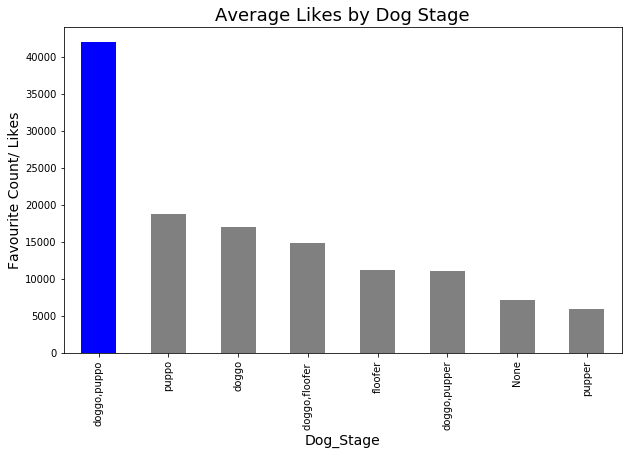

In [118]:
twitter_archive_master.groupby('dog_stage')['favorite_count'].mean().sort_values(ascending=False).plot(kind='bar', color=colors, figsize=(10,6))
plt.title('Average Likes by Dog Stage', fontsize=18)
plt.ylabel('Favourite Count/ Likes', fontsize=14)
plt.xlabel('Dog_Stage', fontsize=14)

**COMMENT:** We can see that the chart shows how compared to other stages **doggo,puppo** received an outrageous number of likes clearer than the statistics showed alone.

## Q3: Which Dog Stage accrued the most Retweets?

In [119]:
twitter_archive_master.groupby('dog_stage')['retweet_count'].mean().sort_values(ascending=False)

dog_stage
doggo,puppo       16141.000000
doggo              6685.142857
puppo              5285.391304
doggo,pupper       4870.111111
floofer            3986.142857
doggo,floofer      2795.000000
None               2202.423242
pupper             1980.527363
Name: retweet_count, dtype: float64

Looking at the statistics above, I can tell that the top 3 dog_stages to receive the most likes(favorite_count) are doggo,puppo doggo and puppo   
Lets show this with a bar plot

In [120]:
colors=['Blue', 'Grey', 'Grey', 'Grey', 'Grey', 'Grey', 'Grey', 'Grey']

Text(0.5,0,'Dog_stage')

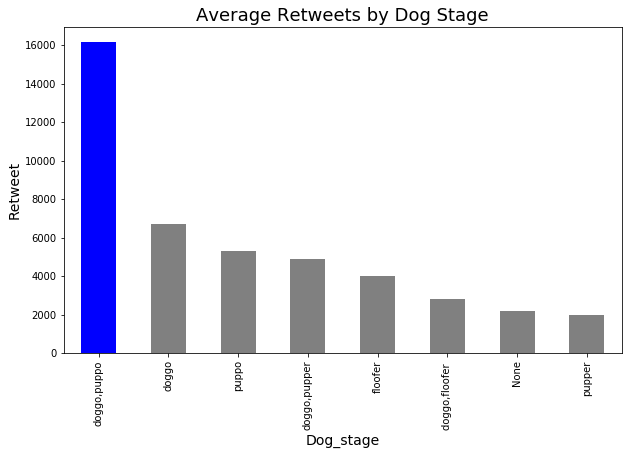

In [121]:
twitter_archive_master.groupby('dog_stage')['retweet_count'].mean().sort_values(ascending=False).plot(kind='bar', color=colors, figsize=(10,6))
plt.title('Average Retweets by Dog Stage', fontsize=18)
plt.ylabel('Retweet', fontsize=14)
plt.xlabel('Dog_stage', fontsize=14)

**COMMENT:** We can see that better than just the statistics alone, the chart shows how compared to other stages **doggo,puppo** received an outrageous number of retweets 


## Q4: Is there any correlation between Retweet_count (retweets) and Favourite_count (likes)?

Text(0,0.5,'LIkes')

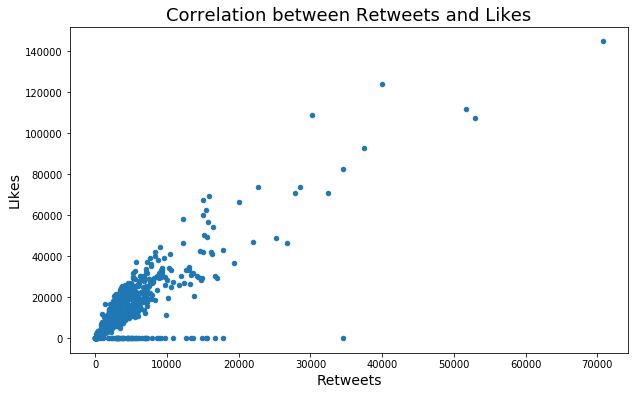

In [128]:
twitter_archive_master.plot(x = "retweet_count", y = "favorite_count", kind ='scatter', figsize=(10,6))
plt.title('Correlation between Retweets and Likes', fontsize=18)
plt.xlabel('Retweets', fontsize=14)
plt.ylabel('LIkes', fontsize=14)

In [123]:
from scipy.stats import pearsonr

In [124]:
pearsonr(twitter_archive_master.retweet_count, twitter_archive_master.favorite_count)

(0.85816103588629566, 0.0)

**COMMENT:** Since r=0.858 which is close to 1, there's a strong correlation between retweets and Likes.
Tweets that garner more retweets are likely to garner more likes

# Q5 : Are tweets tweeted from an Iphone likely to gather more likes?

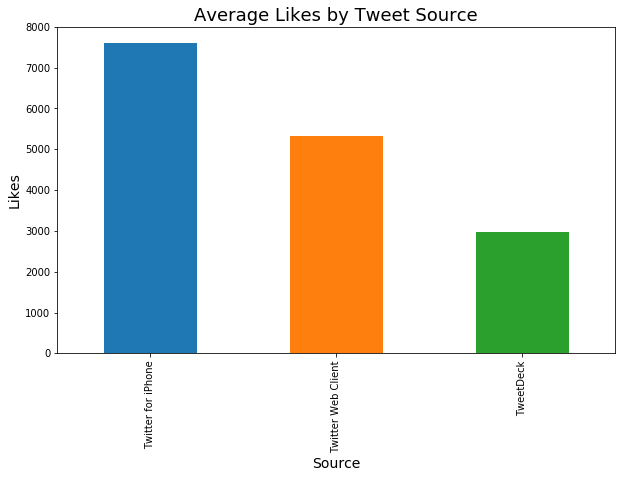

In [129]:
twitter_archive_master.groupby('source')['favorite_count'].mean().sort_values(ascending=False).plot(kind='bar',  figsize=(10,6))
plt.title('Average Likes by Tweet Source', fontsize=18)
plt.xlabel('Source', fontsize=14)
plt.ylabel('Likes', fontsize=14)
plt.figsize=(10,6)

The bar chart shows the average likes tweets by tweet source. it is likely that tweeting from an Iphone gathers more likes, but it is worthy to note that there are other factors that could be at play such as contents of the tweet.